In [1]:
import tensorflow as tf 
from tensorflow import keras

In [2]:
print(keras.__version__)

2.2.4-tf


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[2].shape

(28, 28)

In [7]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [8]:
%matplotlib inline
import matplotlib as mpl

In [9]:
import matplotlib.pyplot as plt

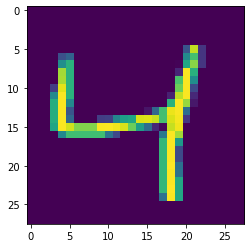

In [10]:
plt.imshow(x_train[2])

In [11]:
y_train[2]

4

In [12]:
x_train, x_test = x_train/255.0, x_test/255.0 #unifying the intensities between 0 and 1

In [13]:
print("Training the model")

Training the model


In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(Dense(units=256, activation='relu')) #256 neurons
model.add(Dense(10, activation='softmax')) #10 digits=10 neurons normalize the units 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
class accuracy99Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.999):
            print("\n\nWe reached 99.9% accuracy!\n")
            self.model.stop_training = True

In [20]:
%%time
# ~ 2 min
model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), callbacks=[accuracy99Callback()])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2237 - accuracy: 0.9346 - val_loss: 0.1166 - val_accuracy: 0.9648
Epoch 2/40
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0932 - accuracy: 0.9723 - val_loss: 0.0846 - val_accuracy: 0.9749
Epoch 3/40
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.0754 - val_accuracy: 0.9760
Epoch 4/40
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0799 - val_accuracy: 0.9772
Epoch 5/40
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0739 - val_accuracy: 0.9787
Epoch 6/40
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.0839 - val_accuracy: 0.9761
Epoch 7/40
60000/60000 [==============================]

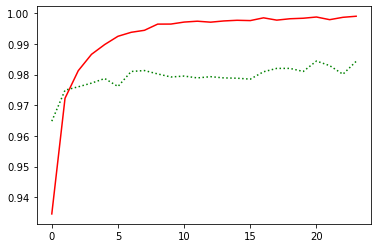

In [21]:
plt.plot(model.history.history['accuracy'], 'r-')
plt.plot(model.history.history['val_accuracy'], 'g:')

In [22]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.0935 - accuracy: 0.9843


[0.09345259402537545, 0.9843]

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 5s 102us/sample - loss: 0.4609 - accuracy: 0.8673 - val_loss: 0.2749 - val_accuracy: 0.9209
Epoch 2/10
45000/45000 [==============================] - 4s 87us/sample - loss: 0.2485 - accuracy: 0.9282 - val_loss: 0.2311 - val_accuracy: 0.9337
Epoch 3/10
45000/45000 [==============================] - 4s 87us/sample - loss: 0.2075 - accuracy: 0.9400 - val_loss: 0.2057 - val_accuracy: 0.9412
Epoch 4/10
45000/45000 [==============================] - 4s 87us/sample - loss: 0.1840 - accuracy: 0.9466 - val_loss: 0.1934 - val_accuracy: 0.9436
Epoch 5/10
45000/45000 [==============================] - 4s 87us/sample - loss: 0.1655 - accuracy: 0.9518 - val_loss: 0.2025 - val_accuracy: 0.9415
Epoch 6/10
45000/45000 [==============================] - 4s 87us/sample - loss: 0.1543 - accuracy: 0.9535 - val_loss: 0.1854 - val_accuracy: 0.9475
Epoch 7/10
45000/45000 [==============================]

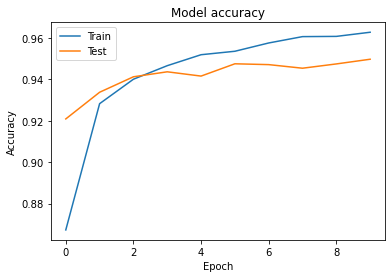

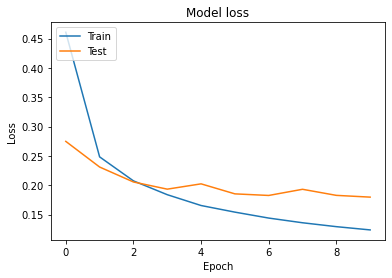

In [23]:
#Data with validaton splitting

import matplotlib.pyplot as plt

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.25,
                    epochs=10,
                    batch_size=16,
                    verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
model_json = model.to_json()
with open("MNIST_model.json", "w") as json_file:
    json_file.write(model_json)